<a href="https://colab.research.google.com/github/fmejias/CienciasDeLosDatosTEC/blob/master/TP2/TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matemáticas para Ciencias de los Datos
# Trabajo práctico 2

- Professor: M.Sc.Saul Calderon.

- Students: 
    - María Auxiliadora Mora, Instituto Tecnológico de Costa Rica  
    - Felipe Alberto Mejías Loría, Instituto Tecnológico de Costa Rica. 

- June 1th, 2019   

In [0]:
# Libraries required for the exercises
import torch as torch
import numpy as np
import random
import math

from torch.distributions import constraints
from torch.distributions.distribution import Distribution
from torch.distributions.utils import _standard_normal, lazy_property

import torch.distributions as distrib

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# 1) Generar puntos plano (20 puntos)



Matrix X: 
 tensor([[  3.0000,   3.6000,   4.2000,   4.8000,   5.4000,   6.0000,   6.6000,
           7.2000,   7.8000,   8.4000,   9.0000,   9.6000,  10.2000,  10.8000,
          11.4000,  12.0000,  12.6000,  13.2000,  13.8000,  14.4000],
        [ 20.0000,  26.5000,  33.0000,  39.5000,  46.0000,  52.5000,  59.0000,
          65.5000,  72.0000,  78.5000,  85.0000,  91.5000,  98.0000, 104.5000,
         111.0000, 117.5000, 124.0000, 130.5000, 137.0000, 143.5000],
        [ 20.4920,  27.1599,  33.7915,  40.4507,  47.0111,  53.6792,  60.3675,
          66.9596,  73.5492,  80.1791,  86.7994,  93.4746, 100.0777, 106.6669,
         113.2584, 119.9069, 126.4547, 133.1384, 139.6965, 146.3404]])


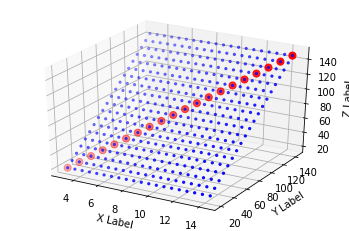

In [2]:
# Exercise 1
def generarPuntosPlano(n=20, mean=0, standardDeviation=0.05):
  """
  This function calculates a dataset and the plot them in 3D
  n: number of points
  mean: mean for the Gaussian distribution
  standardDeviation: standardDeviation for the Gaussian distribution
  return a plot in 3D of the dataset
  """
  
  def scatterPlotDataset3D(x, y ,z, epsilon):
    """
    Scatter plot the dataset
    param dataset: dataset to plot  
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Create 2D tensors with variation along the two axis
    X,Y = torch.meshgrid(x, y)

    # Compute hiperplane function to scattered all plane
    Z = 0.2 * X + Y + epsilon
    
    # Scattered all plane
    ax.scatter(X.numpy(), Y.numpy(), Z.numpy(), c='b', marker='.')
    
    # Scattered n points
    ax.scatter(x.numpy(), y.numpy(), z.numpy(), s=50, c='r', marker='o')

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    plt.show()
    
  def epsilon():
    """
    Create Dataset with gaussian distribution
    param numSamples, number of samples
    """
    #create Gaussian distribution
    distribution = distrib.Normal(mean, standardDeviation)
    #create dataset from distribution
    return distribution.sample((n,))
  
  def plottingPlane():
    
    # Create 1D tensors x and y
    x = torch.arange(3, 15, 0.6)
    y = torch.arange(20, 150, 6.5)
    e = epsilon()
    
    # Hiperplane function
    z = 0.2 * x + y + e
    
    # Save points on a Matrix X
    matrixX = [x, y , z]
    matrixX = torch.stack(matrixX)
    print("Matrix X: \n", matrixX)
    
    # Scattered points in the plane
    scatterPlotDataset3D(x ,y, z, e)
    
    return matrixX
    
  # Plot the dataset  
  return plottingPlane()
  
  
# Test exercise 1
matrizX = generarPuntosPlano()


# 2) Calcular EigenVectores y Valores (30 puntos)

Matriz de covarianza de X: 
 tensor([[  12.6000,  136.5000,  139.0523],
        [ 136.5000, 1478.7500, 1506.4001],
        [ 139.0523, 1506.4001, 1534.5687]])
Eigenvalues: 
 tensor([[ 3.0259e+03,  0.0000e+00],
        [ 7.7068e-04,  0.0000e+00],
        [-5.4662e-06,  0.0000e+00]])
Eigenvectors: 
 tensor([[-0.0645,  0.0781, -0.9939],
        [-0.6991,  0.7079,  0.1092],
        [-0.7121, -0.7020, -0.0171]])
Base Matrix: 
 tensor([[-0.0645,  0.0781],
        [-0.6991,  0.7079],
        [-0.7121, -0.7020]])


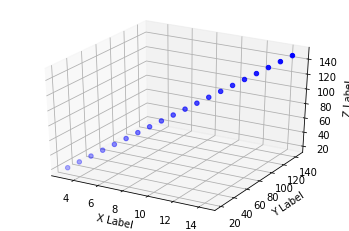

In [22]:
## Exercise 2
def calcularEigenvectoresYValores(X):
  """
  This function calculates eigen vectors and values
  X: matrix from exercise 1
  n: number of eigen vectors to extract
  return a plot in 3D of the dataset
  """
  
  def covariance(A) :
      """
      Calculate the covariance of a matrix 
      A: Matrix with the set of samples.
      Return: The covariance matrix of A
      """
      # the rows mean of A  
      AMean= A.mean(1)

      #1 / (Number of samples - 1)
      n = (1/(A.shape[1]-1))

      #Calculate the transpose of the rows mean. 
      w2Drow = AMean.reshape(-1, AMean.shape[0])
      AMeanT = w2Drow.transpose(0, 1)


      # Calculate the mean of A minus A.
      UA = AMeanT - A

      # Compute the UA transpose. 
      UAT= UA.transpose(0,1)

      # Covariance of A
      Cov = n * UA.mm(UAT)

      return Cov
    
  def plotEigenVectorsAndScatteredPoints(X, eigenVector1, eigenVector2):
      """
      Plot EigenVectors and Scattered Matrix Points
      A: Matrix with the set of samples.
      """
      fig = plt.figure()
      ax = fig.add_subplot(111, projection='3d')

      # Scattered matrix points
      ax.scatter(X[0, :].numpy(), X[1, :].numpy(), X[2, :].numpy(), c='b', marker='o')
      
      # Set vector1, vector2 and vector3
      # plt.plot(eigenVector1.numpy())
      # vector1 = ax.quiver(0, 0, 0, -0.3, 0.8, 0.1, length = 1, normalize = True)
      # vector2 = ax.quiver(0, 0, 0, 0.5, 0.2, 0.4, length = 1, normalize = True)

      ax.set_xlabel('X Label')
      ax.set_ylabel('Y Label')
      ax.set_zlabel('Z Label')

      plt.show()

  # Get covariance matrix from X
  covarianceX = covariance(X)
  print("Matriz de covarianza de X: \n", covarianceX)
  
  # Get eigenvalues and eigenvectors
  # One eigen value per row, and its corresponding eigenvector per column
  eigenValues, eigenVectors = torch.eig(covarianceX , eigenvectors=True)
  print("Eigenvalues: \n", eigenValues)
  print("Eigenvectors: \n", eigenVectors)
  
  # Pick the eigenvectors according to its eigen values
  baseVectors = torch.zeros(3, 2)
  baseVectors[:, 0] = eigenVectors[:, 0]
  baseVectors[:, 1] = eigenVectors[:, 1]
  print("Base Matrix: \n", baseVectors)
  
  # Plot eigenvectors and scatterred matrix points
  plotEigenVectorsAndScatteredPoints(X, eigenVectors[:, 0], eigenVectors[:, 1])
  
  return baseVectors
  


# Test exercise2
baseVectors = calcularEigenvectoresYValores(matrizX)

# 4) Reducir la dimensionalidad de un dataset (40 puntos)

New Dataset: 
 tensor([[-11.4973, -15.4866, -19.4638, -23.4502, -27.4037, -31.3931, -35.3892,
         -39.3532, -43.3164, -47.2930, -51.2665, -55.2582, -59.2259, -63.1890,
         -67.1528, -71.1357, -75.0849, -79.0795, -83.0322, -87.0135],
        [  5.5027,   7.4134,   9.3362,  11.2498,  13.1963,  15.1069,  17.0108,
          18.9468,  20.8836,  22.8070,  24.7335,  26.6418,  28.5741,  30.5110,
          32.4472,  34.3643,  36.3151,  38.2206,  40.1678,  42.0865],
        [  5.9947,   8.0732,  10.1277,  12.2004,  14.2074,  16.2861,  18.3783,
          20.4064,  22.4328,  24.4861,  26.5330,  28.6164,  30.6518,  32.6779,
          34.7056,  36.7713,  38.7698,  40.8589,  42.8643,  44.9269]])
NumSamples: 
 3
Base1: 
 tensor([-0.0645, -0.6991, -0.7121])
Base2: 
 tensor([ 0.0781,  0.7079, -0.7020])
Reduce Matrix: 
 tensor([[ -7.3739,  -9.9324, -12.4829, -15.0395, -17.5744, -20.1330, -22.6960,
         -25.2379, -27.7791, -30.3293, -32.8774, -35.4375, -37.9817, -40.5229,
         -43.0646, 

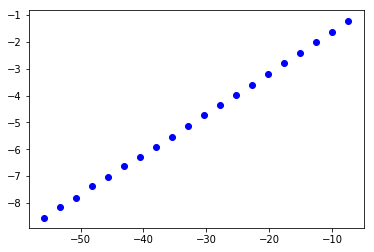

In [37]:
## Exercise 4
def reducirDimensionalidadDataset(dataset, baseVectors):
    """
    Reduce dataset dimensionality
    dataset: 
    baseVectors: 
    """
    
    def plotReduceMatrixAndScatteredPoints(reduceMatrix):
      """
      Scattered Matrix Points
      A: Matrix with the set of samples.
      """

      # Scattered matrix points
      plt.scatter(reduceMatrix[0, :].numpy(), reduceMatrix[1, :].numpy(), c='b', marker='o')

      plt.show()
      
    # Substract the mean to the data for data normalization
    meanSample = torch.mean(dataset, 0)
    newDataset = dataset - meanSample
    print("New Dataset: \n", newDataset)
    
    # 2D data samples
    numDataSamples = newDataset.shape[0]
    print("NumSamples: \n", numDataSamples)
    dataset2D = torch.zeros(numDataSamples, 2)
    base1 = baseVectors[:, 0].squeeze()
    print("Base1: \n", base1)
    base2 = baseVectors[:, 1].squeeze()
    print("Base2: \n", base2)
    
    # Reduce matrix
    reduceMatrix = torch.zeros(2, 20)
    
    # Calculate u*v1
    firstRow = (base1*newDataset.transpose(0, 1)).sum(1, keepdim = True).transpose(0, 1)
    
    # Calculate u*v2
    secondRow = (base2*newDataset.transpose(0, 1)).sum(1, keepdim = True).transpose(0, 1)
    
    # Set new matrix
    reduceMatrix[0, :] = firstRow
    reduceMatrix[1, :] = secondRow
    
    print("Reduce Matrix: \n", reduceMatrix)
    print("Reduce Matrix Shape: \n", reduceMatrix.shape)
    
    # Plot reduce matrix
    plotReduceMatrixAndScatteredPoints(reduceMatrix)
    
    return reduceMatrix
    


# Test reducing the dimensionality of a dataset.
reduceMatrix = reducirDimensionalidadDataset(matrizX, baseVectors)




# 5) Calcular el error utilizando dos autovectores (30 puntos)

In [0]:
## Exercise 4
def checkMatrixPropertyExercise4(A, x):
    """
    Evaluate the property of matrices and vectors described in Exercise 4.
    A: squared matrix of size n.
    x: vector of size 1 x n.
    Return: 1 if the equation of question 4 is true 
            otherwise it returns 0.
    """
    # Calculate a symmetric matrix using A   
    S = 0.5* A + 0.5* A.transpose(0, 1)
    print("Matriz transpuesta", S)
    
    #Calculate the transpose of x. 
    w2Drow = x.reshape(-1, x.shape[0])
    xT = w2Drow.transpose(0, 1)
    
    ## 1- Calculate the equation's left side 
    # Matrix - vector product
    SxT = S.mm(xT)     
    product = (x * SxT.reshape(-1, SxT.shape[0])[0, :])
    
    #Product transpose 
    w2Drow = product.reshape(-1, product.shape[0])
    left = w2Drow.transpose(0, 1).sum()
    print("Lado izquierdo de la ecuación: ", left)
    
    
    ## 2 - Calculate the rigth side
    # Matrix - vector product
    SxT = S.mm(xT)     
    right = (x * SxT.reshape(-1, SxT.shape[0])[0, :]).sum()
    print("Lado derecho de la ecuación: ", right)
    
    return (left - right).sum() <  0.1e-5


# Test Exercise 4 using a ramdon matrix
# Generates a random number between 
# a given positive range 
n = random.randint(3, 10) 

A = torch.randn(n,n)
x = torch.randn(n)

print("Resultado ejercicio 4: ", checkMatrixPropertyExercise4(A, x))



Matriz transpuesta tensor([[-1.5883, -1.1411,  0.6409,  0.1437,  1.2537, -1.3886, -1.5240,  0.0328,
          0.8320],
        [-1.1411,  1.0079, -0.1832,  0.2861,  0.4783,  0.6423, -0.6522, -0.5614,
          0.1148],
        [ 0.6409, -0.1832,  0.4207,  0.1962,  0.8662,  0.6447, -0.4144,  1.1734,
          0.5646],
        [ 0.1437,  0.2861,  0.1962, -0.0808, -0.2412, -0.1028,  0.6016,  0.5373,
          1.1485],
        [ 1.2537,  0.4783,  0.8662, -0.2412,  0.7078,  0.2802,  0.2215,  0.5603,
          0.8547],
        [-1.3886,  0.6423,  0.6447, -0.1028,  0.2802, -1.1723, -0.1855, -0.0054,
          0.4630],
        [-1.5240, -0.6522, -0.4144,  0.6016,  0.2215, -0.1855, -0.2392, -0.6636,
         -1.1807],
        [ 0.0328, -0.5614,  1.1734,  0.5373,  0.5603, -0.0054, -0.6636,  0.3880,
          0.6020],
        [ 0.8320,  0.1148,  0.5646,  1.1485,  0.8547,  0.4630, -1.1807,  0.6020,
          0.1373]])
tensor(-14.1173)
tensor(-14.1173)
Resultado ejercicio 4:  tensor(1, dtype=torch.